In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [4]:
data=data.drop(labels='education',axis=1)    #Dropping education column

In [5]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data_new = pd.DataFrame(imputer.fit_transform(data))
data_new.columns = data.columns
data_new.index = data.index

In [7]:
data_new.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
X = data_new.iloc[:,:-1].values
y = data_new.iloc[:, -1].values

In [10]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()


In [11]:
X_train,Y_train=smote.fit_sample(X,y)

In [12]:
from collections import Counter
print("Before SMOTE: ",Counter(y))
print("After SMOTE: ",Counter(Y_train))

Before SMOTE:  Counter({0.0: 3594, 1.0: 644})
After SMOTE:  Counter({0.0: 3594, 1.0: 3594})


Text(0.5, 1.0, 'Class Distributions after resampling')

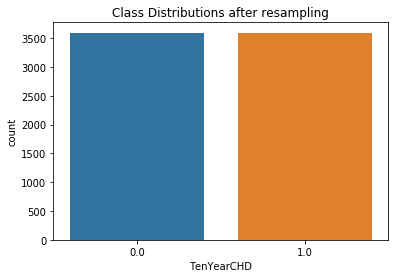

In [13]:
df_temp = {'TenYearCHD' : Y_train}
df = pd.DataFrame(df_temp)

plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling')

In [14]:
Y_train = Y_train.reshape(len(Y_train), 1)
print(X_train.shape, Y_train.shape)

(7188, 14) (7188, 1)


In [15]:
import random
combined=list(zip(X_train,Y_train))

In [16]:
random.shuffle(combined)

In [17]:
X_train[:],Y_train[:]=zip(*combined)

In [18]:
print(X_train.shape, Y_train.shape)

(7188, 14) (7188, 1)


In [19]:
X=np.array(X_train)
y=np.array(Y_train)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape

(5750, 14)

In [23]:
Y_train.shape

(5750, 1)

In [24]:
X_test.shape

(1438, 14)

In [25]:
Y_test.shape

(1438, 1)

In [26]:
X=np.array(X_train)
y=np.array(Y_train)
Xt=np.array(X_test)
yt=np.array(Y_test)
X_train=X.reshape(X.shape[0],-1).T
Y_train=y.reshape(y.shape[0],-1).T
X_test=Xt.reshape(Xt.shape[0],-1).T
Y_test=yt.reshape(yt.shape[0],-1).T

In [27]:
X_train.shape

(14, 5750)

In [28]:
Y_one_hot=np.zeros((2,5750))
j=0
for i in Y_train[0]:
    Y_one_hot[int(i)][j]=1
    j+=1
Y_one_hot_test=np.zeros((2,1438))
k=0
for i in Y_test[0]:
    Y_one_hot_test[int(i)][k]=1
    k+=1

In [29]:
def create_placeholders(n_x,n_y):
    X_new=tf.placeholder(tf.float32,[n_x,None],name="X_new")
    Y_new=tf.placeholder(tf.float32,[n_y,None],name="Y_new")
    return X_new,Y_new

In [30]:
def initialize_parameters():
    W1 = tf.get_variable("W1",[64,14],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[64,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2",[64,64],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",[64,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3",[64,64],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",[64,1],initializer=tf.zeros_initializer())
    W4 = tf.get_variable("W4",[64,64],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b4 = tf.get_variable("b4",[64,1],initializer=tf.zeros_initializer())
    W5 = tf.get_variable("W5",[2,64],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b5 = tf.get_variable("b6",[2,1],initializer=tf.zeros_initializer())
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5
                         }
    
    return parameters

In [31]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    Z1 = tf.add(tf.matmul(W1,X),b1)          
    A1 = tf.nn.relu(Z1)                      
    Z2 = tf.add(tf.matmul(W2,A1),b2)         
    A2 = tf.nn.relu(Z2)                      
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)         
    A4 = tf.nn.relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)         
    
    return Z5

In [32]:
def compute_cost(Z5,Y):
    logits = tf.transpose(Z5)
    labels = tf.transpose(Y)                       #in the softmax function we want logits and labels in (no.of eg,no.of feature) 
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost

In [33]:
def model(X_train,Y_train,X_test,Y_test):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    
    X,Y = create_placeholders(n_x,n_y)
    
    parameters = initialize_parameters()
    
    Z5 = forward_propagation(X,parameters)
    
    cost = compute_cost(Z5,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    
    init = tf.global_variables_initializer()
    costs=[]
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(30000):
            _,c=sess.run([optimizer,cost],feed_dict={X:X_train,Y:Y_train})
            if epoch%200==0:
                print(c)
            if epoch%5==0:
                costs.append(c)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.show()
        
            
        parameters=sess.run(parameters)
        
        correct_prediction = tf.equal(tf.argmax(Z5), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        return parameters


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

2.638926
0.5374843
0.49292773
0.4579865
0.44040248
0.40193346
0.3873968
0.34629926
0.32274404
0.30514643
0.33686462
0.26776108
0.25673738
0.24845189
0.23063606
0.22067687
0.270483
0.20070937
0.20339009
0.18127316
0.17096125
0.1644635
0.19211273
0.16872127
0.16108507
0.24980755
0.14463423
0.8242388
0.1385618
0.1328605
0.14260468
0.11862293
0.11369249
0.12525028
0.29694453
0.25529373
0.23112498
0.21314572
0.2000065
0.18130809
0.1733557
0.15955283
0.15187548
0.15807144
0.13727455
0.12504649
0.223260

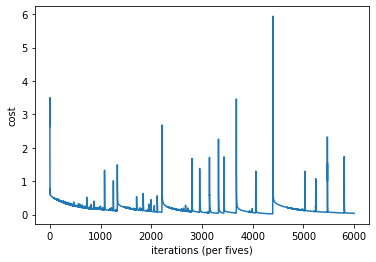

Train Accuracy: 0.9906087
Test Accuracy: 0.94367176


In [34]:
parameters=model(X_train,Y_one_hot,X_test,Y_one_hot_test)

In [35]:
import pickle

In [36]:
file=open('My_Model.pkl','wb')

In [37]:
pickle.dump(parameters,file)